## Libraries

In [46]:
import sklearn
import numpy as np
import pandas as pd
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Dataset 

In [47]:
dataset=pd.read_csv('dataset_q2_q4.csv')
dataset

,x1,x2,x3,y_label
0,-100.838182,100.000000,0.000000,-6.908485e+06
1,-98.826004,101.202405,0.901804,-7.167624e+06
2,-98.627987,102.404810,1.803607,-7.429470e+06
3,-96.960173,103.607214,2.705411,-7.699765e+06
4,-97.190325,104.809619,3.607214,-7.972486e+06
...,...,...,...,...
495,294.786321,695.190381,446.392786,1.206979e+09
496,296.056099,696.392786,447.294589,1.216369e+09
497,297.526847,697.595190,448.196393,1.225805e+09
498,300.037521,698.797595,449.098196,1.235292e+09


In [48]:
X=dataset.drop('y_label', axis=1)
Y=dataset['y_label']

In [49]:
X=np.array(X)
Y=np.array(Y)

## Split the dataset into 70% train data and 30% test data

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.4)

In [52]:
# Printing the size of datasets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(300, 3) (200, 3) (300,) (200,)


# implement linear regression using gradient decent based The loss function

$h(x)_ \theta= 3\theta_1*x^{2}_1+ \theta_2*x^{3}_2 -\theta_3*x^{3}_2 + \theta_2*\theta_3*x^{3}_3+\theta_0 $

2.6842887311855576e+16


(392.4662921136086, 2.2183700943839115, 1.8111512121879147, 1.5959187862358302)

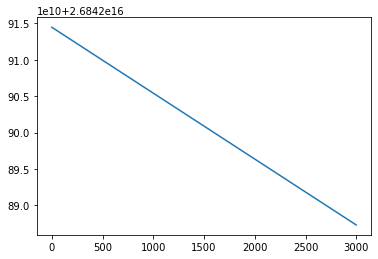

In [72]:
def fit_line(X,Y,lr=0.02,epechs=4):
    
    # values of theta 
    theta0=0.
    t = np.zeros(X.shape[1])
    t1=0.
    t2=0.
    t3=0.
    # prepare of Featuers
    X1=X[:,0]
    X2=X[:,1] 
    X3=X[:,2]

    no_train=X.size
    losses=[]
    
    # preparing each term of hypothises
    term1=3*t1*X1**2
    term2=t2*X2**3
    term3=-t3*X2**3
    term4=t2*t3*X3**3
    
    for _ in range(epechs):
        
        
        #Hypothises
        y_hat=term1+term2+term3+term4+theta0
        
        #preparing Cost Function (loss)
        loss=np.sum((y_hat-Y)**2)/(no_train*2)
        losses.append(loss)
            
        #preparing partial derivation for each theta
        G1=3*X1**2 
        G2=X2**3+t3*X3**3
        G3=X2**3+t2**3
            
        #preparing Gradient 
        theta0_grad=np.sum(y_hat-Y)*1 #no_train
        theta1_grad=np.matmul((G1),(y_hat-Y))/no_train
        theta2_grad=np.matmul((G2),(y_hat-Y))/no_train
        theta3_grad=np.matmul((G3),(y_hat-Y))/no_train
            
        ## new values for theta
        theta0-=lr*theta0_grad 
        t1-=lr*theta1_grad
        t2-=lr*theta2_grad 
        t3-=lr*theta3_grad 
        
    print(loss)    
    plt.plot(list(range(epechs)),losses)
    return theta0,t1,t2,t3     
        
        
fit_line(X_train,Y_train,lr=0.0000000000021,epechs=3000)